instal component

In [ ]:
!pip install openpyxl
!pip install seaborn matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


load dataset

In [ ]:
file_path = '/content/dataKasus-1.xlsx'
df = pd.read_excel(file_path, sheet_name='2022')

# Tampilkan beberapa baris pertama dataset
print(df.head())


   NO    NAMA   USIA  PARITAS JARAK KELAHIRAN RIW HIPERTENSI RIW PE OBESITAS  \
0   1  NAMA 1  23 TH        3       < 2 tahun          Tidak  Tidak    Tidak   
1   2  NAMA 2  29 TH        2       < 2 tahun          Tidak    PEB    Tidak   
2   3  NAMA 3  20 TH        1    anak pertama          Tidak  Tidak    Tidak   
3   4  NAMA 4  18 TH        1    anak pertama          Tidak  Tidak    Tidak   
4   5  NAMA 5  34 TH        3      > 2 tahun           Tidak  Tidak    Tidak   

  RIW DM RIW HIPERTENSI/PE DALAM KELUARGA SOSEK RENDAH PE/Non PE Unnamed: 12  
0     Ya                            Tidak         >UMR    Non PE         NaN  
1  Tidak                              Ada         >UMR        PE         NaN  
2  Tidak                            Tidak         >UMR    Non PE         NaN  
3  Tidak                            Tidak         >UMR    Non PE         NaN  
4  Tidak                            Tidak         >UMR    Non PE         NaN  


pembersihan dataset

In [ ]:
df_cleaned = df.drop(columns=['NO', 'Unnamed: 12'])


In [ ]:
df_cleaned['USIA'] = df_cleaned['USIA'].str.extract('(\d+)').astype(float)

# Mengganti nilai NaN dengan nilai rata-rata usia
df_cleaned['USIA'].fillna(df_cleaned['USIA'].mean(), inplace=True)
df_cleaned['USIA'] = df_cleaned['USIA'].astype(int)


Mengonversi Kolom Kategorikal

In [ ]:
# Mengganti nilai 'Ya'/'Tidak' dan lainnya ke format Boolean atau kategori
replace_map = {
    'RIW HIPERTENSI': {'Ya': True, 'Tidak': False},
    'RIW PE OBESITAS': {'Ya': True, 'Tidak': False},
    'RIW DM': {'Ya': True, 'Tidak': False},
    'RIW HIPERTENSI/PE DALAM KELUARGA': {'Ada': True, 'Tidak': False},
    'SOSEK RENDAH': {'<UMR': 'Low', '>UMR': 'High'},
    'PE/Non PE': {'PE': 'PE', 'Non PE': 'Non_PE'}
}

df_cleaned.replace(replace_map, inplace=True)


Mengatasi Nilai Hilang (Missing Values)

In [ ]:
# Cek jumlah nilai yang hilang
missing_values = df_cleaned.isnull().sum()
print('Nilai yang hilang di setiap kolom:')
print(missing_values)

# Mengatasi nilai hilang (misal: mengisi dengan modus untuk kolom kategorikal)
for col in df_cleaned.select_dtypes(include='object').columns:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)


Nilai yang hilang di setiap kolom:
NAMA                                0
USIA                                0
PARITAS                             0
JARAK KELAHIRAN                     7
RIW HIPERTENSI                      0
RIW PE                              0
OBESITAS                            0
RIW DM                              0
RIW HIPERTENSI/PE DALAM KELUARGA    0
SOSEK RENDAH                        0
PE/Non PE                           0
dtype: int64


Membuat Kolom Baru

In [ ]:
def categorize_age(age):
    if age < 20:
        return 'Remaja'
    elif 20 <= age < 30:
        return 'Dewasa Muda'
    elif 30 <= age < 40:
        return 'Dewasa'
    else:
        return 'Lanjut Usia'

df_cleaned['Kategori Usia'] = df_cleaned['USIA'].apply(categorize_age)


Transformasi Data


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding untuk kolom kategorikal
label_enc_cols = ['SOSEK RENDAH', 'PE/Non PE', 'Kategori Usia']
le = LabelEncoder()

for col in label_enc_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])


Normalisasi Fitur Numerik

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = ['USIA', 'PARITAS']

df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])


visualisasi data

In [ ]:
print(df_cleaned['Kategori Usia'].unique())


[1 3 0 2]


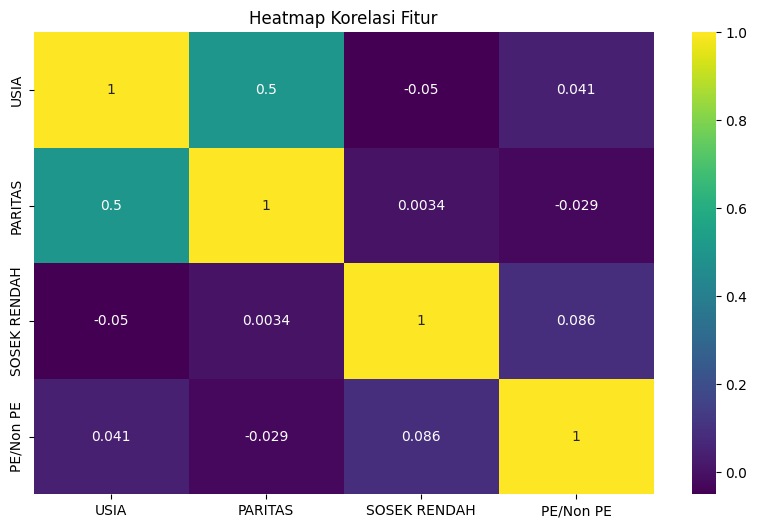

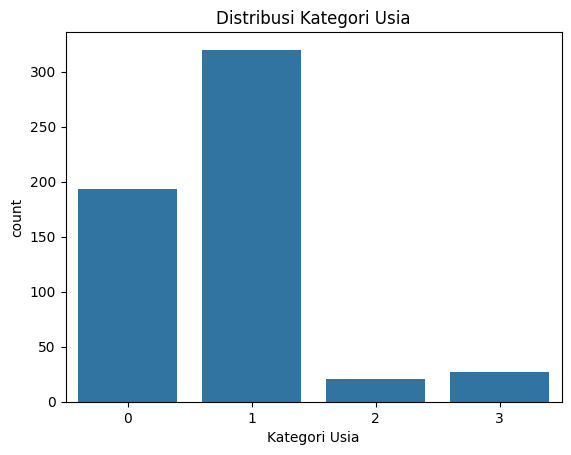

In [ ]:
# Korelasi antar fitur
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.drop(columns=['NAMA', 'Kategori Usia']).select_dtypes(include=np.number).corr(), annot=True, cmap='viridis')
plt.title('Heatmap Korelasi Fitur')
plt.show()

# Distribusi kategori usia
sns.countplot(x='Kategori Usia', data=df_cleaned)
plt.title('Distribusi Kategori Usia')
plt.show()